# Problem Set 5 

[Jovana Ramos]

[Sense of Belonging and Academic Experience] 

[4/22/2020]


### 1. Develop hypotheses involving a muli-item scale as either a dependent variable (DV) or independent variable (IV) [1 pt]

Do the following when you write your hypothesis:

    A. Write a couple sentences about the theoretical reasons (prior knowledge / research) for why you think that multiple dependent or independent variables of interest are correlated with eachother in one or more groupings
According to research (Tinto) students who have a sense of belonging on their campus are most likely to have better grades and finish their degree. Therefore, I have grouped variables that measure sense of belonging and variables that measure academic satisfaction.

    B. Tell us a 1-word variable name that you will assign to each multi-item scale that you think could well represent your potentially correlated variables. The 1-word variable names should reflect your theory in response to prompt A above.
Belong
    
    C. State the predicted direction of association between your dependent variable DV (multi-item scales or otherwise) and independent variables (IVs) (multi-item scales or otherwise) in your proposed model. You can predict no relationship if you do not expect a relationship.
I believe there to be a positive association between my dependent variable and independent variables.

In [145]:
clear
set line 200
set more off
cd C:\Users\Jovis\Desktop\SOC_211\Week_12
use UCUES, clear
*log using assignment_5, replace





C:\Users\Jovis\Desktop\SOC_211\Week_12



In [146]:
codebook rucsatacademic rucsatvalue rucagreereenrll rucagreebelong


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
rucsatacademic                                                                                                                        Please rate your level of satisfaction-Overall academic experience
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  RUCSATAC

                 range:  [1,6]                        units:  1
         unique values:  6                        missing .:  21,660/26,978

            tabulation:  Freq.   Numeric  Label
                           122         1  Very dissatisfied
                           290         2  Dissatisfied
                

### 2. Estimate a correlation matrix [1 pt]

    A. The matrix should include at least 4 independent or dependent variables (but not both) that you want to include in your multi-item scales 
    B. Make a list in this markdown cell that categorizes each potential correlation as strong or weak
    C. Standardize the 4 variables so that they are all positively correlated

In [147]:
*looking at the codebook output above it looks like the variables I plan to examine are already postively correlated, therefore they will only be renamed
rename rucsatacademic academicexperience
rename rucsatvalue price
rename rucagreereenrll ReEnroll
rename rucagreebelong Belonging

In [148]:
pwcorr academicexperience price ReEnroll Belonging, sig


             | academ~e    price ReEnroll Belong~g
-------------+------------------------------------
academicex~e |   1.0000 
             |
             |
       price |   0.5799   1.0000 
             |   0.0000
             |
    ReEnroll |   0.5102   0.4607   1.0000 
             |   0.0000   0.0000
             |
   Belonging |   0.5219   0.4589   0.7686   1.0000 
             |   0.0000   0.0000   0.0000
             |


### 3. Estimate factor loadings [1 pt]

    A. Estimate factor loadings for the variables you propose including in your multi-item scale(s)

In [149]:
factor academicexperience price ReEnroll Belonging

(obs=5,285)

Factor analysis/correlation                      Number of obs    =      5,285
    Method: principal factors                    Retained factors =          2
    Rotation: (unrotated)                        Number of params =          6

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      2.18020      1.99262            1.0712       1.0712
        Factor2  |      0.18758      0.33994            0.0922       1.1634
        Factor3  |     -0.15236      0.02782           -0.0749       1.0885
        Factor4  |     -0.18018            .           -0.0885       1.0000
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 9121.55 Prob>chi2 = 0.0000

Factor loadings (pattern matrix) and unique variance

    B. Rotate and plot the factor loadings

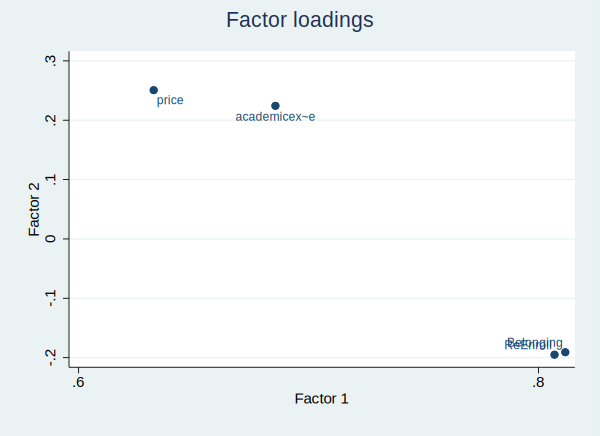

In [150]:
loadingplot, norotated




Factor analysis/correlation                      Number of obs    =      5,285
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =          6

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      1.54304      0.71830            0.7582       0.7582
        Factor2  |      0.82474            .            0.4052       1.1634
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 9121.55 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+----

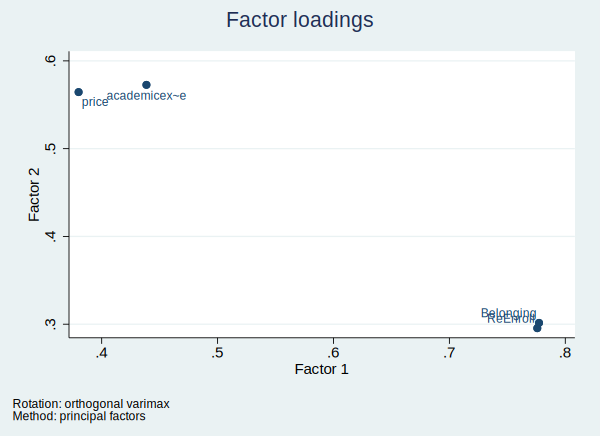

In [151]:
quietly factor academicexperience price ReEnroll Belonging
rotate, varimax
loadingplot

    C. Do the factor loadings support your hypothesis that multiple items should be grouped into a scale?
    D. Do the factor loadings suggest any proposed items should not be included in your scale? Or that an additional scale is in order?

### 4. Calculate the scales and test them in a regression model [1 pt]

    A. Generate new scale variables that average all the items in eacj scale.

In [152]:
gen academics=(price+academicexperience)/2
gen Belong=(ReEnroll+Belonging)/2


(21,671 missing values generated)

(21,676 missing values generated)






Factor analysis/correlation                      Number of obs    =      2,691
    Method: principal factors                    Retained factors =          3
    Rotation: orthogonal varimax (Kaiser off)    Number of params =         15

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.78937      0.18710            0.8751       0.8751
        Factor2  |      0.60227      0.56780            0.6677       1.5428
        Factor3  |      0.03446            .            0.0382       1.5810
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(15) = 1420.48 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -----------------------------------------------------------
        Va

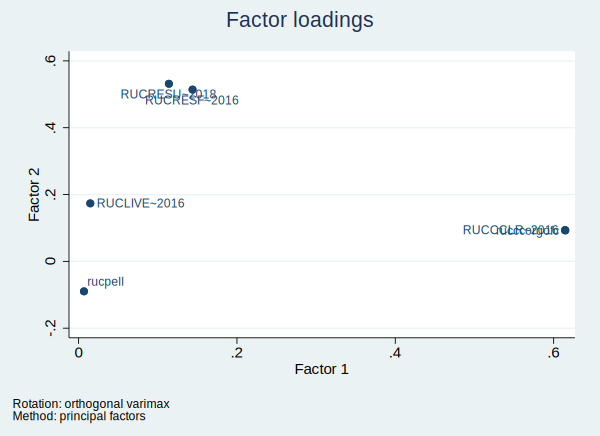





(24,089 missing values generated)

(21,927 missing values generated)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
 involvement |      2,889   -.1310142    .3460232        -.5        .75
satisfaction |      5,051   -.7709365    .2255301         -1          0


In [153]:
foreach var in rucccorg rucccorgofc RUCLIVELEARN2016 RUCCCLRECRUIT2016 rucpell RUCRESFAC2016 RUCRESUNDFAL2018 {
quietly replace `var'=`var'-1
}
quietly factor rucccorg rucccorgofc RUCLIVELEARN2016 RUCCCLRECRUIT2016 rucpell RUCRESFAC2016 RUCRESUNDFAL2018
rotate, varimax
loadingplot
gen involvement=(rucccorg+rucccorgofc+RUCLIVELEARN2016+RUCCCLRECRUIT2016)/4
gen satisfaction=(rucpell+RUCRESFAC2016+RUCRESUNDFAL2018)/3
sum involvement satisfaction

    B. Standardize each scale to be 0-1

In [154]:
foreach var in academics Belong academicexperience price ReEnroll Belonging {
quietly replace `var'=`var'-1
quietly replace `var'=`var'/4 if `var'!=0
}
sum academics Belong academicexperience price ReEnroll Belonging




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   academics |      5,307    .7317223    .2658944          0       1.25
      Belong |      5,302    .8346614    .2878512          0       1.25
academicex~e |      5,318    .7857747    .2679976          0       1.25
       price |      5,311    .6776031      .32933          0       1.25
    ReEnroll |      5,312    .8470915    .3154118          0       1.25
-------------+---------------------------------------------------------
   Belonging |      5,309    .8225184    .2965214          0       1.25


    C. Estimate separate models that regress your dependent variables on your independent variables 1) using the scale variables, and 2) using the separate component items of the scale variables

In [155]:
quietly {
est clear
eststo: regress involvement academics Belong satisfaction age, ro
eststo: regress satisfaction academics Belong academics age, ro
eststo: regress involvement academicexperience price ReEnroll Belonging age, ro
eststo: regress satisfaction academicexperience price ReEnroll Belonging age, ro
}

    D. Output your models (at least 2 models) using esttab so we can easily compare results

In [156]:
esttab ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("involvement" "satisfaction" "involvement" "satisfaction") ///
collabels(none) keep(academics Belong academicexperience price ReEnroll Belonging)


--------------------------------------------------------------------------------
                      (1)              (2)              (3)              (4)    
              involvement     satisfaction      involvement     satisfaction    
--------------------------------------------------------------------------------
academics           -0.03            -0.01                                      
                   (0.06)           (0.03)                                      
Belong               0.10 ^           0.04                                      
                   (0.06)           (0.03)                                      
academics                             0.00                                      
                                       (.)                                      
academicex~e                                          -0.11 ^          -0.06 ^  
                                                     (0.07)           (0.03)    
price                      

### 5. Interpret your regression estimates [1 pt]

    A. Which of your hypotheses were supported or rejected?
I see there being a positive association between involvement and the feeling of belonging. There is a small standard error between the two variables.

    B. Were the coefficients using your multi-item scales in the same direction as the coefficients for their component variables?
Some of the coefficients were in the same direction as the coefficients for their component variables.
  
    C. Were the coefficients larger or more statistically significant when you used multi-item scales?
 The coefficients were definitely larger when I used the multi-item scales.